In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# DATA LOAD PART

In [2]:
nan = ['NA','N/A','Na','N/a','na','n/a',np.nan]
df = pd.read_csv(r'hotel_booking.csv', na_values=nan)

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


# DATA WRANGLING PART

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.isnull().sum()/df.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [7]:
df.shape

(119390, 36)

In [8]:
drop_col = ['company','agent','email','phone-number','credit_card','name']
df.drop(columns=drop_col,axis=1,inplace=True)

In [9]:
for i in df.columns:
    unique_val = df[i].unique()
    print(i)
    print(unique_val)
    print('_'*100)

hotel
['Resort Hotel' 'City Hotel']
____________________________________________________________________________________________________
is_canceled
[0 1]
____________________________________________________________________________________________________
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356

In [10]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [11]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [12]:
null_list = [var for var in df.columns if df[var].isnull().sum() > 0]
null_list

['children', 'country']

In [13]:
df['country'] = df['country'].fillna('PRT')

In [14]:
df.isnull().sum().sum()

4

In [15]:
null_list2 = [var for var in df.columns if df[var].isnull().sum() > 0]
null_list2

['children']

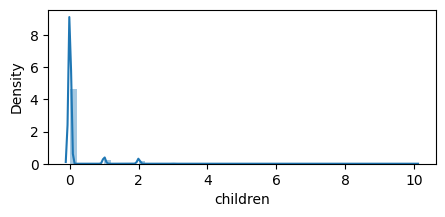

In [16]:
plt.figure(figsize=(5,2))

for i,var in enumerate(df[null_list2]):
    plt.subplot(1,1,i+1)
    sb.distplot(df[var])
    
plt.show()

In [17]:
df['children'] = df['children'].fillna(0)

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


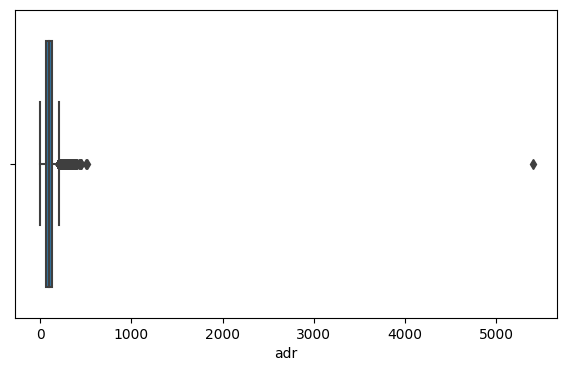

In [21]:
plt.figure(figsize=(7,4))
sb.boxplot(x='adr',data = df)
plt.show()

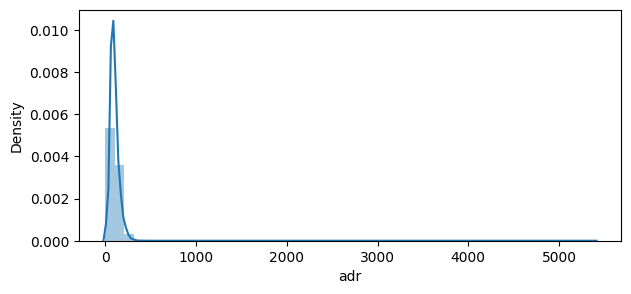

In [22]:
plt.figure(figsize=(7,3))
sb.distplot(df['adr'])
plt.show()

In [23]:
df = df[df['adr']<500]

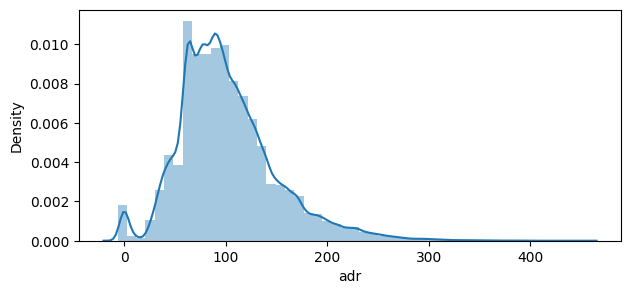

In [24]:
plt.figure(figsize=(7,3))
sb.distplot(df['adr'])
plt.show()

In [25]:
df.isnull().sum().sum()

0

In [26]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [27]:
df['Month'] = df['reservation_status_date'].dt.month

In [28]:
df['reservation_status_date'].dtype

dtype('<M8[ns]')

# DATA ANALYSIS PART

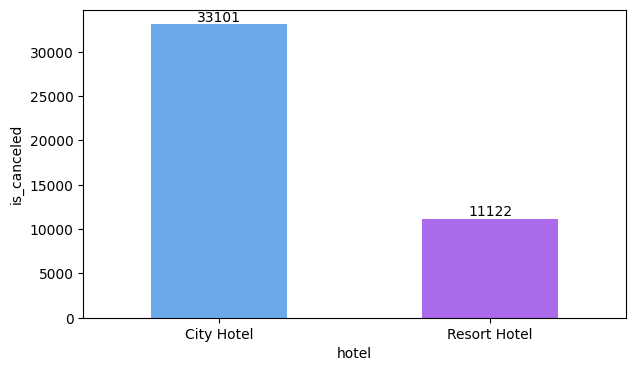

In [29]:
plt.figure(figsize=(7,4))

a = df.groupby('hotel',as_index=False)['is_canceled'].sum().sort_values(by='is_canceled',ascending=False)
plot1 = sb.barplot(x='hotel',y='is_canceled',data=a, palette='cool',width=0.5)

for i in plot1.containers:
    plot1.bar_label(i)
    
plt.show()

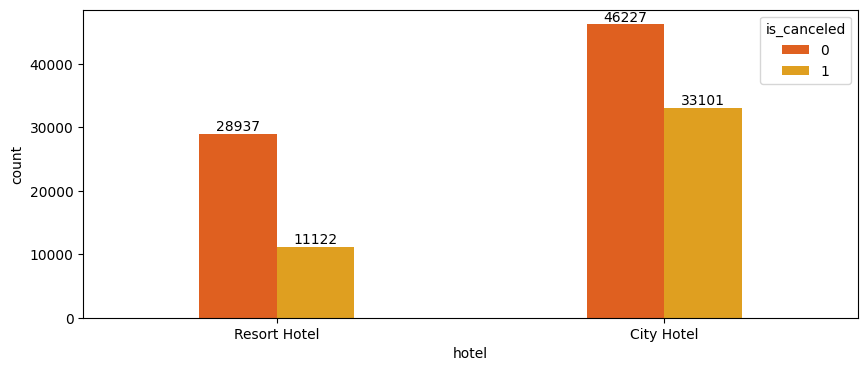

In [30]:
plt.figure(figsize=(10,4))

cancel_notcancel_count = sb.countplot(x='hotel',data=df, hue='is_canceled', palette='autumn', width=0.4)

for i in cancel_notcancel_count.containers:
    cancel_notcancel_count.bar_label(i)

plt.show()

In [31]:
resort_df=df[df['hotel']=='Resort Hotel']
city_df=df[df['hotel']=='City Hotel']

s=pd.concat([resort_df['is_canceled'].value_counts(normalize=True), 
             city_df['is_canceled'].value_counts(normalize=True)])
print(s*100)

is_canceled
0    72.235952
1    27.764048
0    58.273245
1    41.726755
Name: proportion, dtype: float64


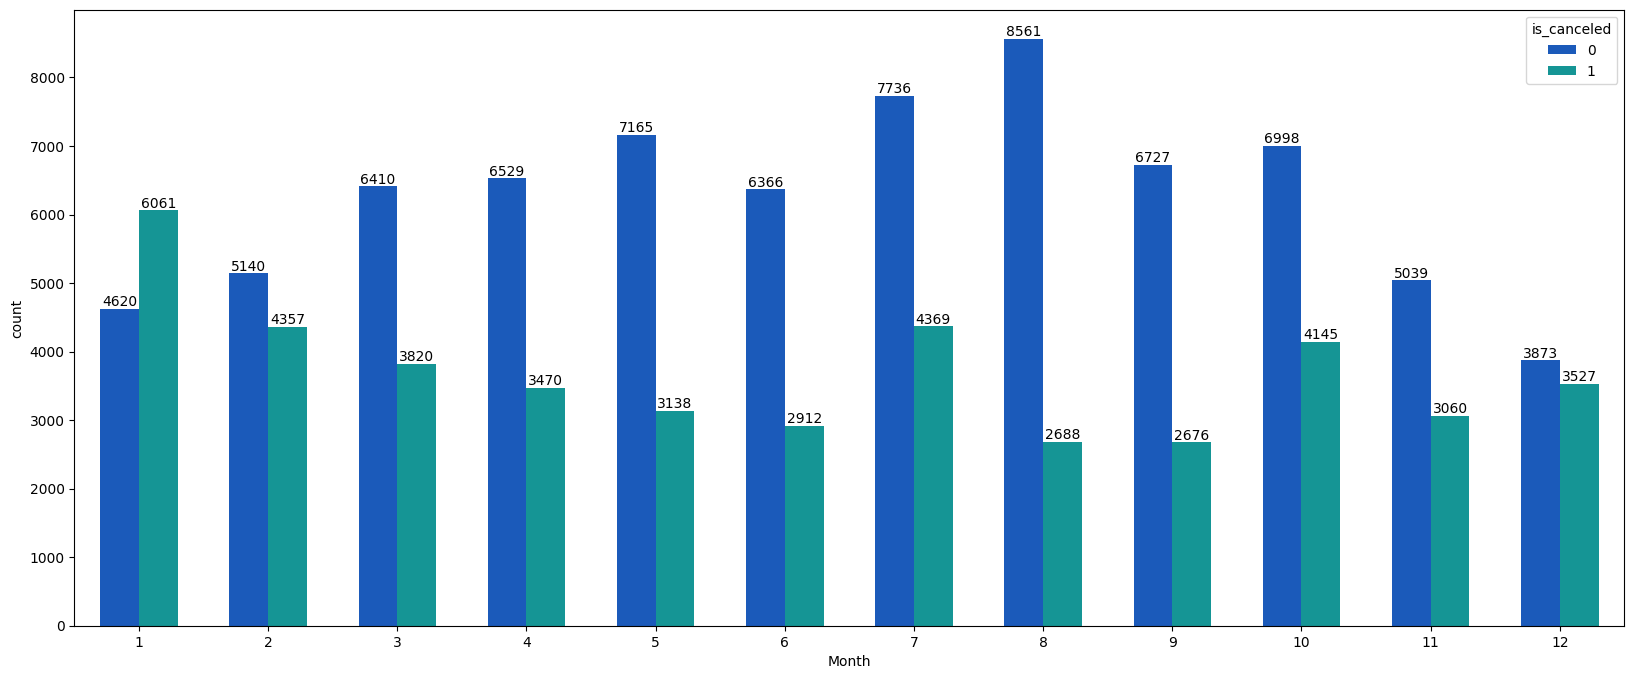

In [49]:
plt.figure(figsize=(20,8))
f = sb.countplot(x='Month', data=df, hue='is_canceled', palette='winter', width=0.6)
for col in f.containers:
    f.bar_label(col)
    
plt.show()

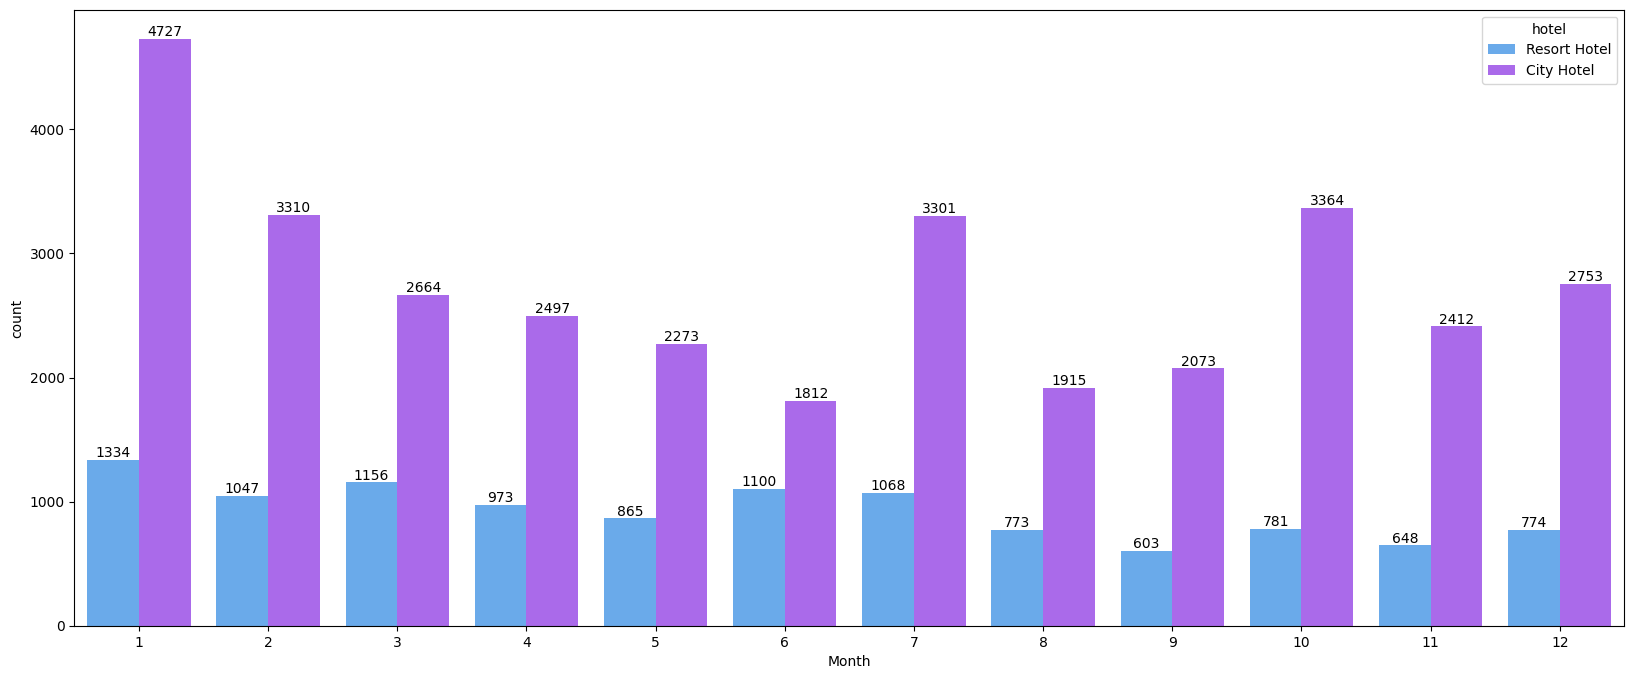

In [50]:
plt.figure(figsize=(20,8))
j = sb.countplot(x='Month', data=df[df['is_canceled']==1], hue='hotel', palette='cool')
for col in j.containers:
    j.bar_label(col)

plt.show()

In [34]:
city_canceled_df = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]

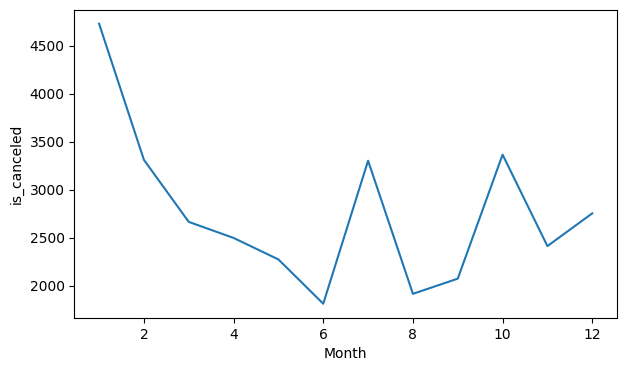

In [35]:
plt.figure(figsize=(7,4))

b = city_df.groupby('Month',as_index=False)['is_canceled'].sum()
plot2 = sb.lineplot(x='Month',y='is_canceled',data=b, palette='autumn')

for i in plot2.containers:
    plot2.bar_label(i)
    
plt.show()

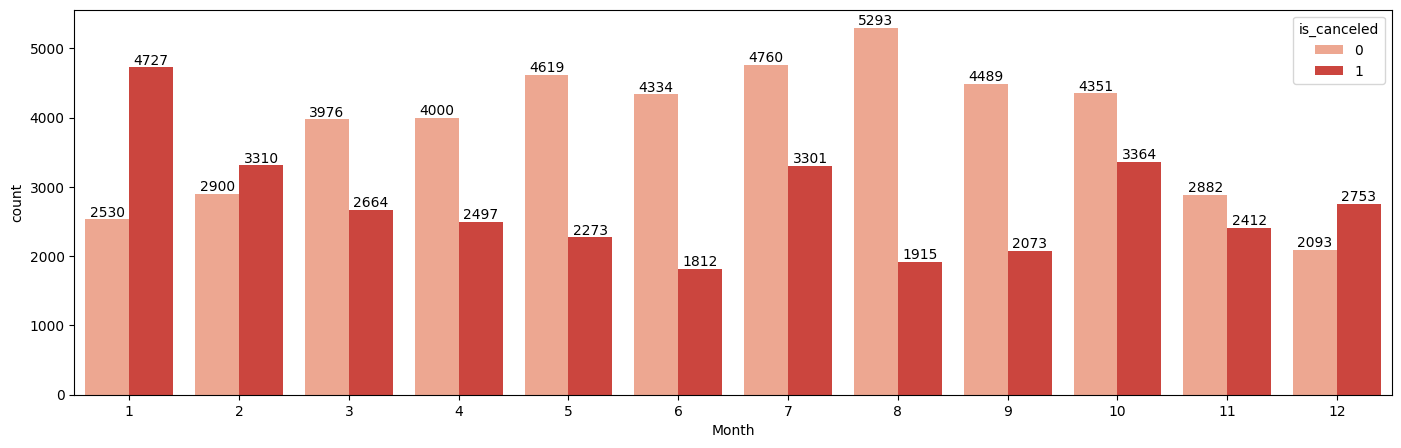

In [36]:
plt.figure(figsize=(17,5))

plot3 = sb.countplot(x='Month',data=city_df, palette='Reds',width=0.8,hue='is_canceled')

for i in plot3.containers:
    plot3.bar_label(i)
    
plt.show()

In City Hotel January has cancel more than reserved,
              August has most reservation count.

## January Analysis

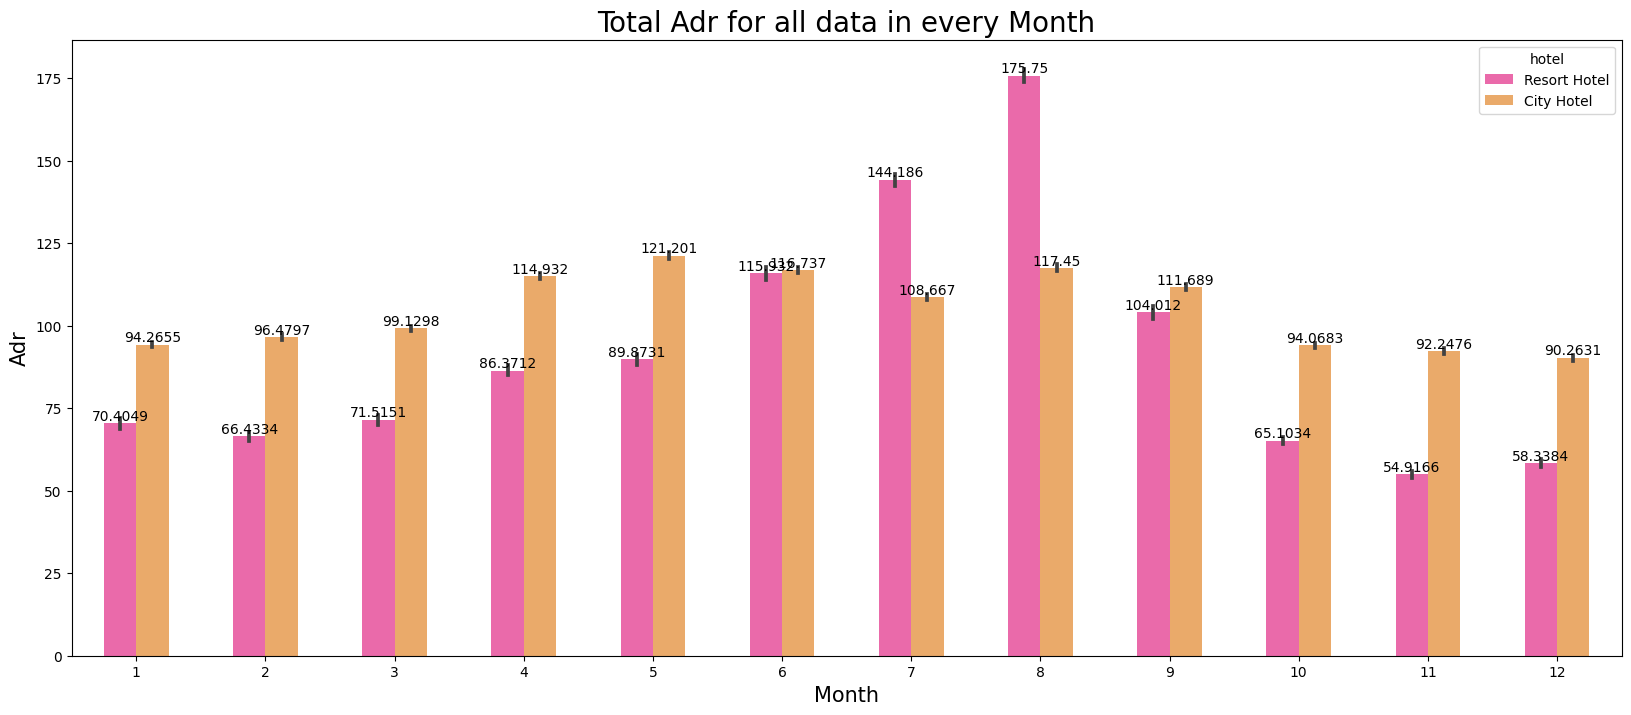

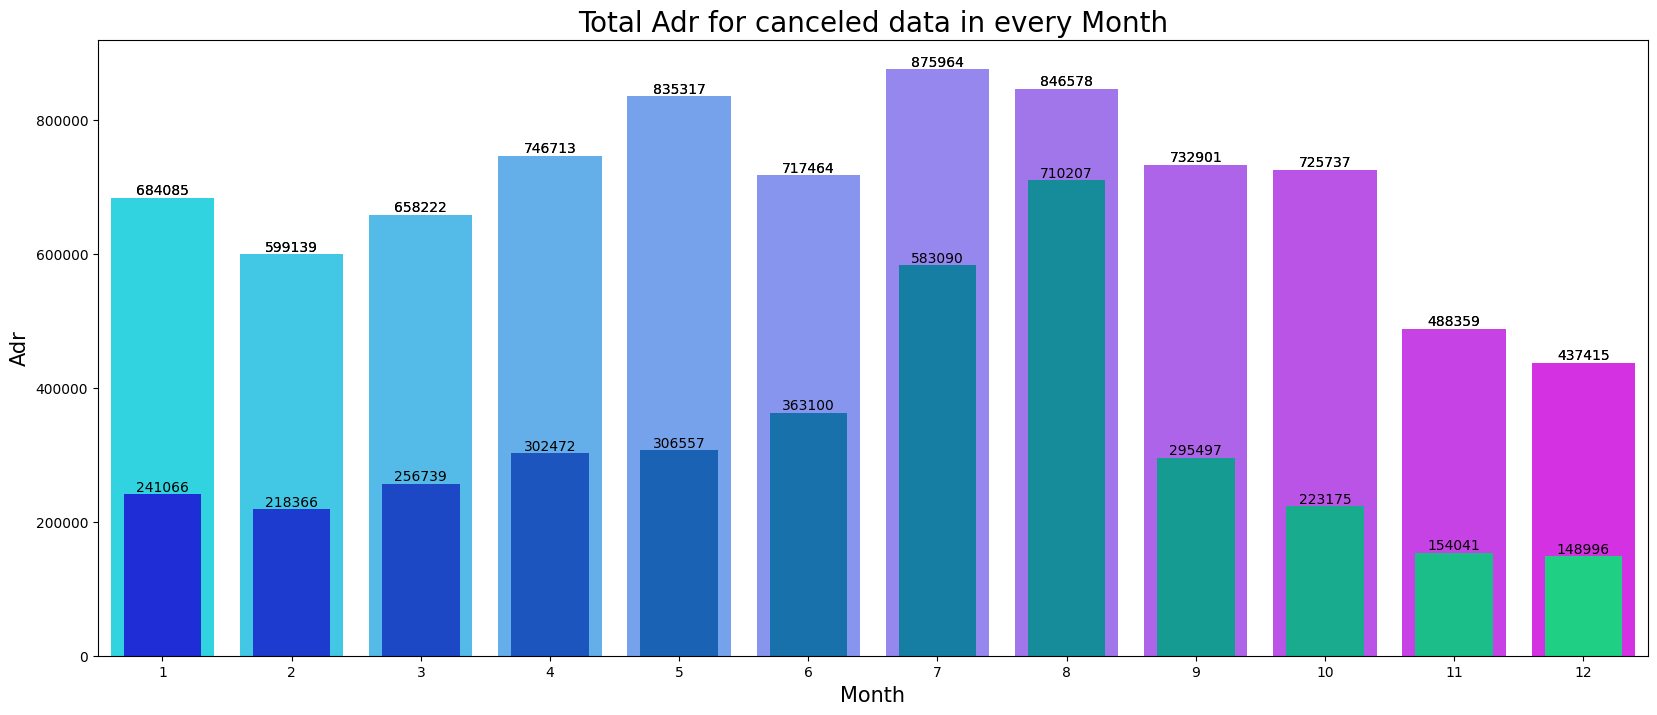

In [37]:
plt.figure(figsize= (20,8))

i= sb.barplot(x='Month', y='adr', data=df , hue='hotel', palette='spring', width=0.5)

for col in i.containers:
    i.bar_label(col)
plt.title('Total Adr for all data in every Month', fontsize=20)  
plt.xlabel('Month', fontsize=15)    
plt.ylabel('Adr', fontsize=15)  
plt.show()


plt.figure(figsize=(20,8))

b = city_df.groupby('Month',as_index=False)['adr'].sum()
plot4 = sb.barplot(x='Month',y='adr',data=b, palette='cool',width=0.8)

for i in plot4.containers:
    plot4.bar_label(i)
    
c = resort_df.groupby('Month',as_index=False)['adr'].sum()
plot5 = sb.barplot(x='Month',y='adr',data=c, palette='winter',width=0.6)

for j in plot5.containers:
    plot5.bar_label(j)
    
plt.title('Total Adr for canceled data in every Month', fontsize=20)  
plt.xlabel('Month', fontsize=15)    
plt.ylabel('Adr', fontsize=15)  
plt.show()

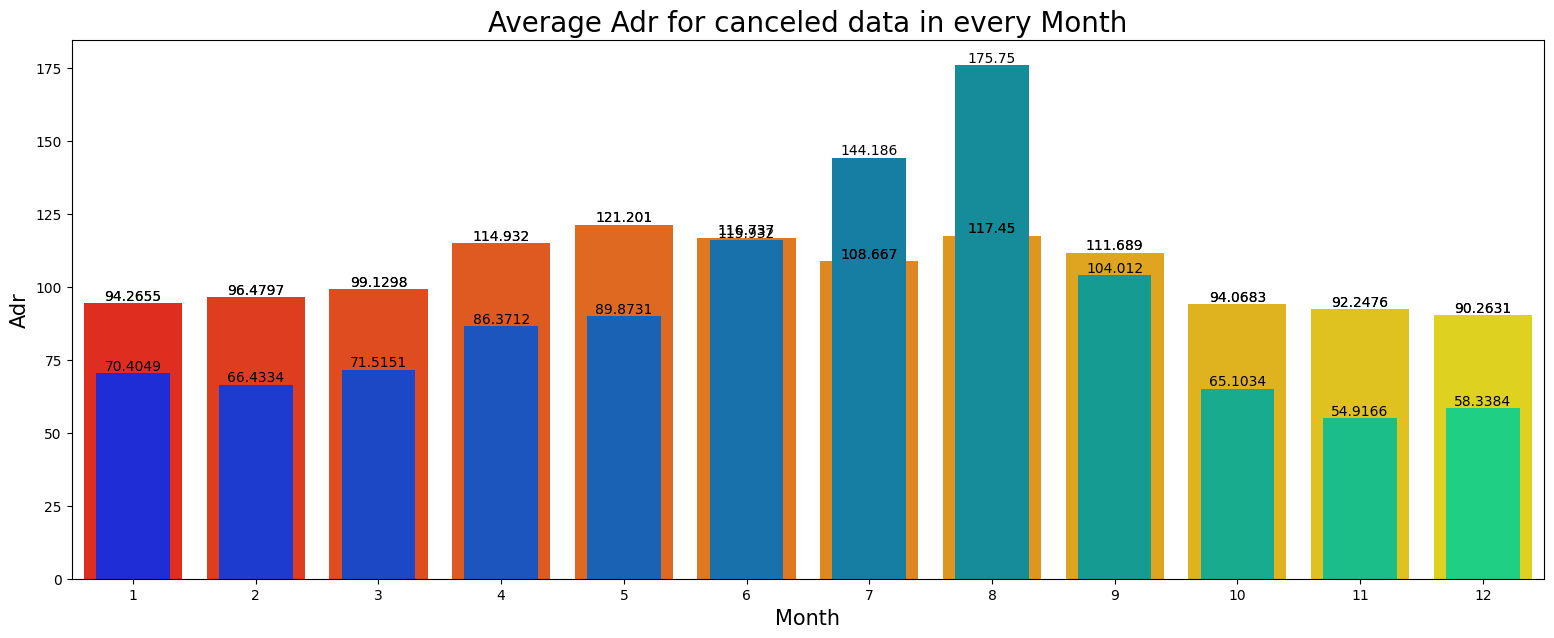

In [38]:
plt.figure(figsize=(19,7))

b = city_df.groupby('Month',as_index=False)['adr'].mean()
plot4 = sb.barplot(x='Month',y='adr',data=b, palette='autumn',width=0.8)

for i in plot4.containers:
    plot4.bar_label(i)
    
c = resort_df.groupby('Month',as_index=False)['adr'].mean()
plot5 = sb.barplot(x='Month',y='adr',data=c, palette='winter',width=0.6)

for j in plot5.containers:
    plot5.bar_label(j)
    
plt.title('Average Adr for canceled data in every Month', fontsize=20)  
plt.xlabel('Month', fontsize=15)    
plt.ylabel('Adr', fontsize=15)  
plt.show()

Lessen the adr compare to the resort hotel in January. So cancelation will be reduced in City hotel.
Resort hotel has high adr in August than City hotel. Thats why City hotel cancelation is low in August.

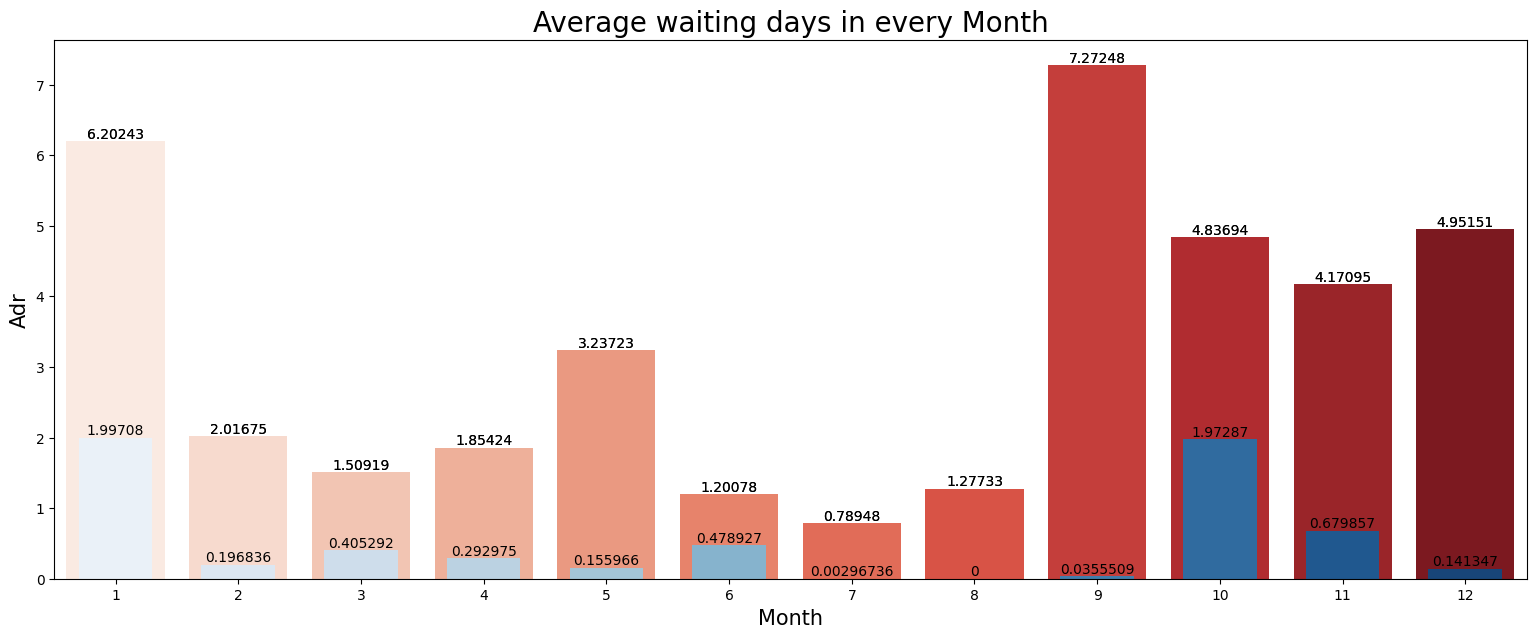

In [39]:
plt.figure(figsize=(19,7))

b = city_df.groupby('Month',as_index=False)['days_in_waiting_list'].mean()
plot4 = sb.barplot(x='Month',y='days_in_waiting_list',data=b, palette='Reds',width=0.8)

for i in plot4.containers:
    plot4.bar_label(i)
    
c = resort_df.groupby('Month',as_index=False)['days_in_waiting_list'].mean()
plot5 = sb.barplot(x='Month',y='days_in_waiting_list',data=c, palette='Blues',width=0.6)

for j in plot5.containers:
    plot5.bar_label(j)
    
plt.title('Average waiting days in every Month', fontsize=20)  
plt.xlabel('Month', fontsize=15)    
plt.ylabel('Adr', fontsize=15)  
plt.show()

Waiting day of city hotel should be more less than resort hotel.

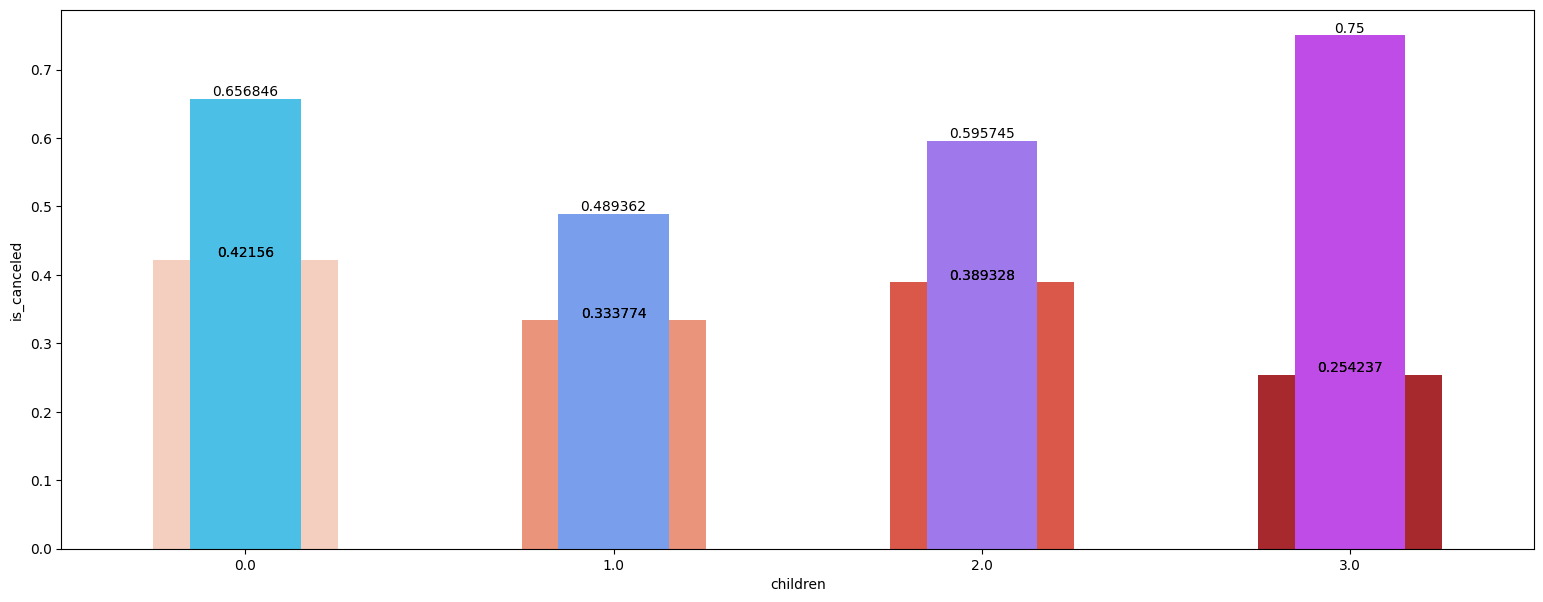

In [40]:
plt.figure(figsize=(19,7))
    
#plot = sb.countplot(x='children',data=city_canceled_df, palette='Greens',width=0.8)

b = city_df.groupby('children',as_index=False)['is_canceled'].mean()
plot4 = sb.barplot(x='children',y='is_canceled',data=b, palette='Reds',width=0.5)

for i in plot4.containers:
    plot4.bar_label(i)

city_df_january = city_df[df['Month']==1]
c = city_df_january.groupby('children',as_index=False)['is_canceled'].mean()
plot4 = sb.barplot(x='children',y='is_canceled',data=c, palette='cool',width=0.3)
#plot1 = sb.countplot(x='children',data=city_canceled_df_january, palette='cool',width=0.3)

for i in plot4.containers:
    plot4.bar_label(i)
    
plt.show()

In city hotel in the month of Jannuary group with 3 childrens has the most cancellation average.

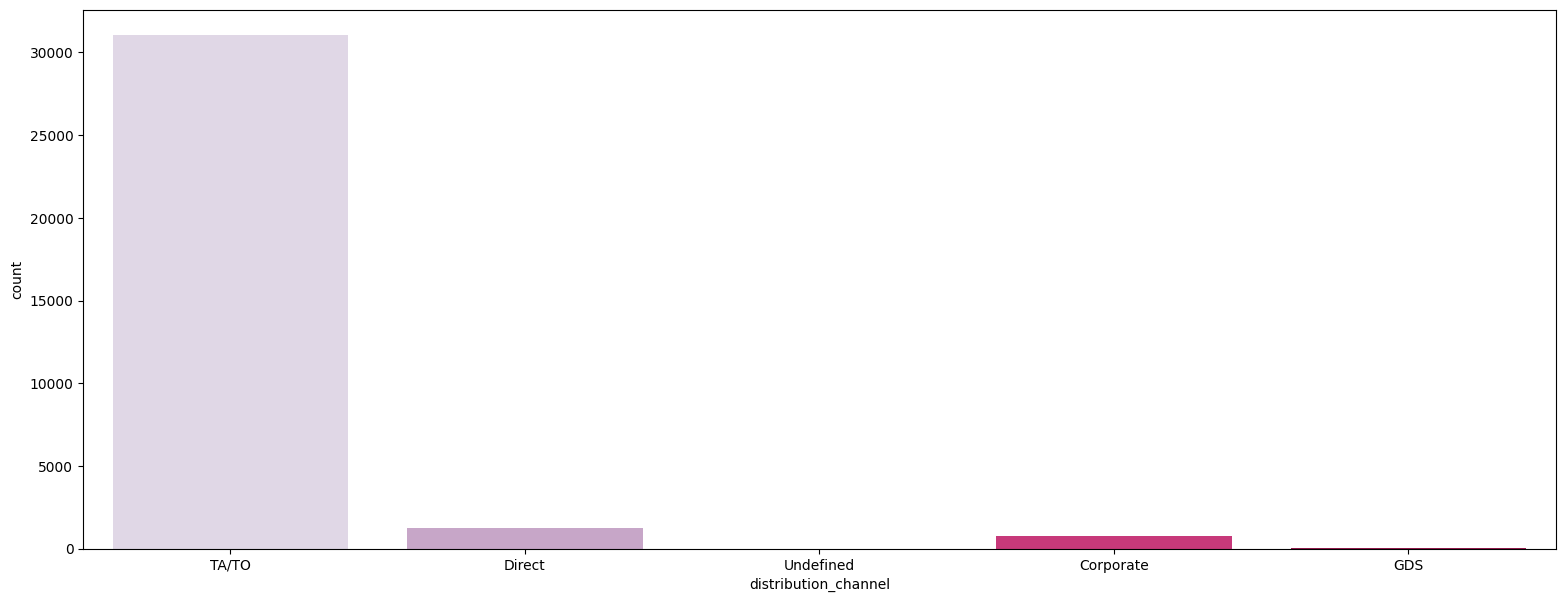

In [41]:
plt.figure(figsize=(19,7))
    
plot = sb.countplot(x='distribution_channel',data=city_canceled_df, palette='PuRd',width=0.8)

plt.show()

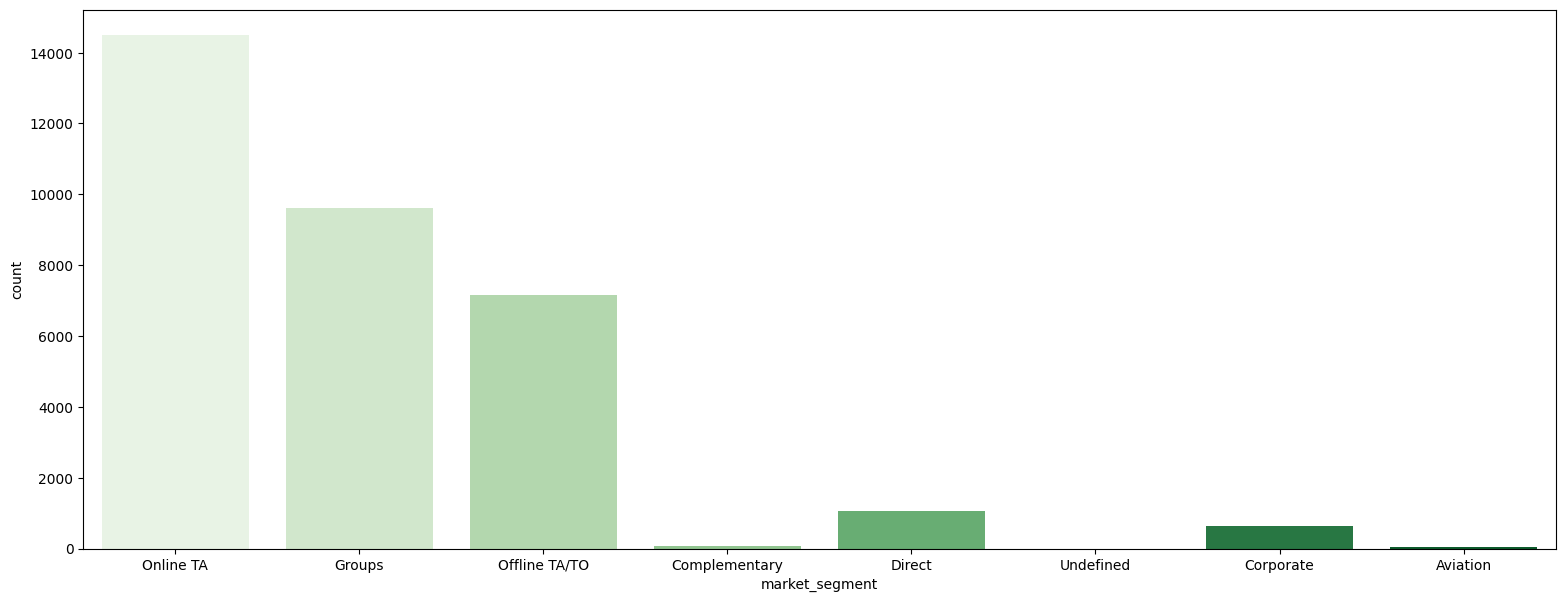

In [42]:
plt.figure(figsize=(19,7))
    
plot = sb.countplot(x='market_segment',data=city_canceled_df, palette='Greens',width=0.8)

plt.show()

Whatever customers see in the online about the city hotel it doesn't match with reality when they arrive.

In [43]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Month'],
      dtype='object')

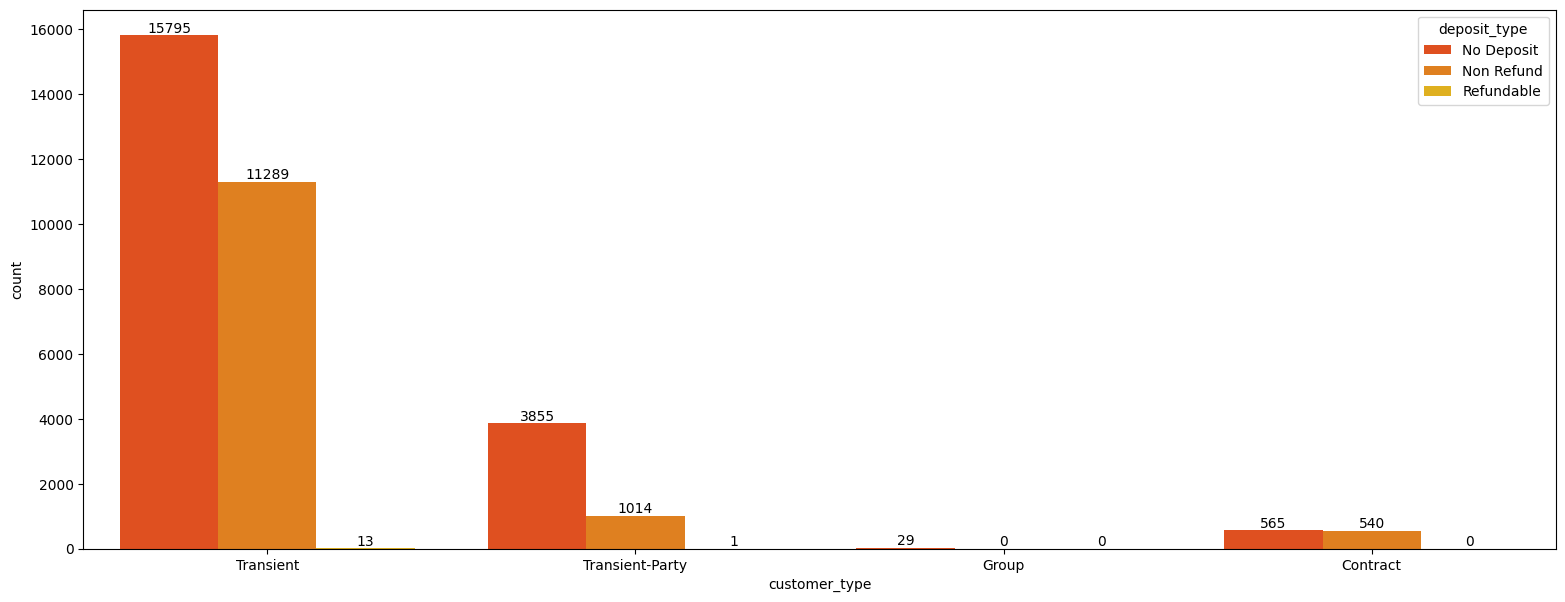

In [44]:
plt.figure(figsize=(19,7))
    
plot = sb.countplot(x='customer_type',data=city_canceled_df, palette='autumn',width=0.8,hue='deposit_type')

for i in plot.containers:
    plot.bar_label(i)

For transient type of customer refumdable type should be granted in city hotel.

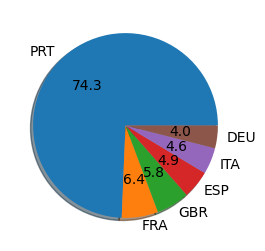

In [45]:
plt.figure(figsize=(3,3))
s = city_canceled_df['country'].value_counts()[:6]
plt.pie(s, labels=s.index, normalize=True, autopct='%.1f',shadow=True)

plt.show()

PRT country is the significantly high for cancelation for city hotel

In [46]:
pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


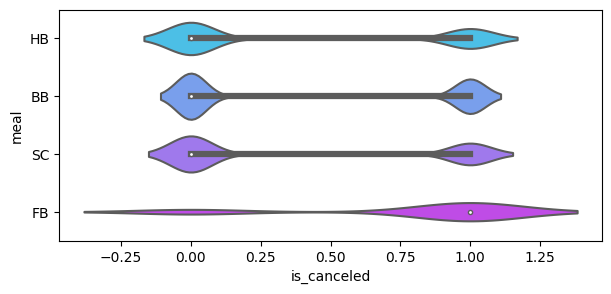

In [47]:
plt.figure(figsize=(7,3))
sb.violinplot(x='is_canceled',y='meal',data = city_df, palette='cool')
plt.show()

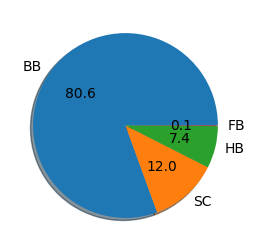

In [48]:
plt.figure(figsize=(3,3))
s = city_canceled_df['meal'].value_counts()[:6]
plt.pie(s, labels=s.index, normalize=True, autopct='%.1f',shadow=True)

plt.show()

The meal BB has the highest count of cancelation. So improve this menu.